Ранее я писал обзор на статью [Frequentism and Bayesianism A Python-driven Primer]($Frequentism and Bayesianism A Python-driven Primer$). В этой статье сравнивается два подхода к статистическому выводу: фишеровский (или фреквентистский) и байесовский. При анализе этой статьи мне пришел в голову один простой, но показательный пример.

### Эксперимент

Представим, что мы хотим оценить значение некоего неизвестного нам параметра $\mathbf{p}$, имея экспериментальные данные и используя байесовский вывод. Мы посчитали правдоподобие полученных экспериментальных данных $\mathbf{Likelihood(data\ |\ p)}$ при всех значениях параметра $\mathbf{p}$. Результаты показаны на графике ниже.

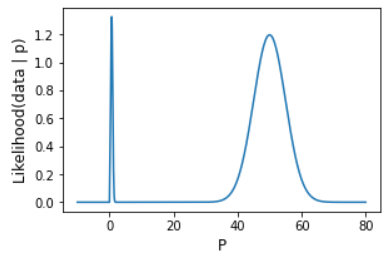

Далее мы используем "неинформативное" плоское априорное распределение (flat prior), таким образом апостериорное распределение вероятностей значения параметра равно $\mathbf{Likelihood(data\ |\ p)}$, с точностью до нормализации. Это означает, что график выше означает апостериорное распределение вероятностей искомого параметра.

Какое значение параметра наиболее вероятно? Вопрос неоднозначный. С одной стороны, максимум правдоподобия приходится на значение $\mathbf{p}=0.7$. С другой стороны, нам обычно интересует не только наиболее вероятное значение, но и байесовский доверительный интервал (credible region) вокруг этого значения. То есть мы хотим найти такой интервал, в котором $\mathbf{p}$ лежит с вероятностью, скажем, 95%. Если при этом мы хотим, чтобы интервал был непрерывным, то нужно брать его вокруг точки 50, "проигнорировав" пик в районе 0.7.

Если говорить в общем, то по графику видны два пика: $\mathbf{p}$ лежит в районе 40-60 с вероятностью  95% и в районе 0 с верояностью 5%.

Пока что никакого логического противоречия не возникает.

Теперь немного изменим формулировку задачи. Давайте оценивать не сам параметр, а его логарифм. Уже поняли, что при этом изменится?

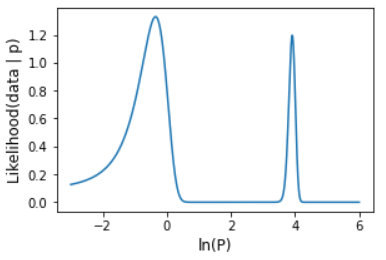

Это та же самая зависимость, но для параметра выбран логарифмический масштаб. Снова выбираем "неинформативный" flat prior, но уже для $\ln\mathbf{p}$. Больше нет никаких отличий. Но вывод получается совсем иным: $\ln\mathbf{p}$ лежит в районе -2-0 с вероятностью  95% и в районе 4 с верояностью 5%. А значит $\mathbf{p}$ лежит в районе 0 с вероятностью  95% и в районе 50 с верояностью 5%.

### Обсуждение

*Разве могут быть этот и предыдущий выводы верны одновременно? А если нет, то в каком из экспериментов ошибка?* По-видимому ни в каком из них ошибки нет, просто мы использовалы разные априорные распределения (priors). Можно показать, что смена масштаба оси, по которой отложен параметр, эквивалентна смене априорного распределения. Априорная вероятность Джеффриса $P(p) ∝ 1/p$, использованная вместо "плоской" априорной вероятности $P(p) ∝ 1$ эквивалентна смене масштаба оси на логарифмический.

В данном случае метод максимального правдоподобия в фишеровской статистике эквивалентен байесовскому выводу с плоским априорным распределением. Таким образом, в байесовской статистике делается явным то, что в фишеровской статистике используется неявно. По-видимому, от априорных предположений никуда не уйти, можно лишь закрыть на них глаза.

Ни при байесовском, ни при фишеровском выводе не возникает парадокса. В байесовском выводе мы делаем разные выводы на одних и тех же данных, поскольку используем разные априорные предположения. В фишеровском выводе доверительные интервалы отвечают на несколько другой вопрос, нежели в байесовском: уровень доверия 95% говорит о том, что при бесконечном повторении эксперимента в 95% случаев найденный интервал будет содержать искомый параметр. При этом в каждой итерации эксперимента $\mathbf{p}$ *выбирается из равномерного распределения*. Это эквивалентно указанию плоского априорного распределения для $\mathbf{p}$ в байесовском подходе.

Процитирую автора [статьи]($Frequentism and Bayesianism A Python-driven Primer$), на которую ранее делал обзор:

>• A Bayesian would say: “Given our observed data, there
is a 95% probability that the true value of θ lies within
the credible region”.

>• A frequentist would say: “If this experiment is repeated
many times, in 95% of these cases the computed confidence interval will contain the true θ.”

Таким образом, *как фишеровский, так и байесовский подход используют априорные знания*. Однако в байесовском подходе это делается более явно. Фишеровский же подход отвечает вообще не на тот вопрос, который обычно ставят исследователи. Если нас интересует некий скрытый фиксированный параметр, то мы не можем повторить эксперимент неограниченное количество раз с разным значением этого параметра. Нас интересует уверенность в том или ином диапазоне значений параметра, чему более соответствует именно байесовский подход. При этом мы можем столкнуться с парадоксами, подобными описанному выше, но мы знаем, в чем причина этих парадоксов - в различных априорных предположениях, и мы должны выбрать из них наиболее правдоподобное.